In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import numpy as np

plt.style.use('science')

In [2]:
hz80 = pd.read_csv('data/80MHz.csv')
hz85 = pd.read_csv('data/85MHz.csv')
hz90 = pd.read_csv('data/90MHz.csv')
# hz80['U'] = hz80['U'] - hz80['U'].max()/2 - hz80['U'].min()/2
# print(hz80['U'].max())

for dat in [hz80, hz85, hz90]:
    dat['U'] = dat['U'] - dat['U'][0]/2 - dat['U'].iloc[-1]/2 
    # print((dat['U'].max() - dat['U'].min()/2) )


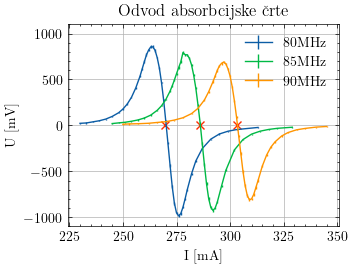

In [3]:
plt.errorbar(hz80['I'], -hz80['U'], hz80['Uerr'], label='80MHz')
plt.errorbar(hz85['I'], -hz85['U'], hz85['Uerr'], label='85MHz')
plt.errorbar(hz90['I'], -hz90['U'], hz90['Uerr'], label='90MHz')
plt.grid()
plt.ylim((-1100, 1100))
plt.xlabel('I [mA]')
plt.ylabel('U [mV]')
plt.legend()
plt.plot([269.5, 286.1, 303.3], [0,0,0], 'x')
plt.title('Odvod absorbcijske črte')
plt.savefig('porocilo/abs.pdf', dpi=512)

In [19]:
I = np.array([269.5, 286.1, 303.3])
B0 = I*4*np.pi*1e-7*1557/0.186
Berr = np.array([13, 13, 15])*4*np.pi*1e-7*1557/0.186

w = 1/Berr

In [20]:
coeffs, cov = np.polyfit([80, 85, 90], B0, 1, w=w, cov=True)

errs = np.sqrt(np.diag(cov))

print("Coefficients:", coeffs)
print("Errors:", errs)

Coefficients: [ 0.03552209 -0.00782162]
Errors: [0.00038157 0.03229609]


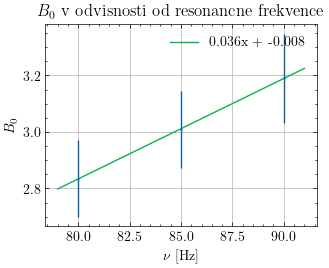

In [26]:
plt.errorbar([80,85,90], B0, Berr, fmt='.', ms=1)
fr = np.linspace(79, 91, 100)
plt.plot(fr, coeffs[0]*fr + coeffs[1], label=f'{round(coeffs[0], 3)}x + {round(coeffs[1], 3)}')
plt.grid()
plt.legend()
plt.xlabel('$\\nu$ [Hz]')
plt.ylabel('$B_0$')
plt.title('$B_0$ v odvisnosti od resonancne frekvence')
plt.savefig('porocilo/b0.pdf', dpi=512)

In [24]:
g = 6.626e-34/9.271e-24/coeffs[0]
gerr = 6.626e-34/9.271e-24/coeffs[0]**2*errs[0]
print(g, gerr)

2.0119921705782817e-09 2.161222099976261e-11
